In [2]:
import pandas as pd
df_review = pd.read_csv('training_reviews.csv',header=None)

In [3]:
df_review.shape

(1600000, 6)

In [2]:
#displaying the top 200 rows of the dataset
df_review.head(200)

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
195,0,1467860268,Mon Apr 06 22:32:40 PDT 2009,NO_QUERY,AmyJade,didn't get shit done today ~ i'm so screwed
196,0,1467860895,Mon Apr 06 22:32:50 PDT 2009,NO_QUERY,tantrixie,wanttss to go out
197,0,1467860904,Mon Apr 06 22:32:51 PDT 2009,NO_QUERY,supersharayah,Is not going to sleep tonite.
198,0,1467861095,Mon Apr 06 22:32:54 PDT 2009,NO_QUERY,bluepaintred,too worried and tired to post tonight


In [3]:
#change the column name of 5 to "text"
df_review.rename(columns={5:'text'},inplace=True)

In [4]:
#replace the rows with review 0 to "neg" and 4 to "pos"
df_review.replace(to_replace=0,value="neg",inplace=True)
df_review.replace(to_replace=4,value="pos",inplace=True)

In [5]:
#displaying the dataset
df_review

,0,1,2,3,4,text
0,neg,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,neg,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,neg,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,neg,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,neg,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,pos,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,pos,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,pos,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,pos,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [6]:
#counting the values of the both positive and negative categories in the dataset
df_review.loc[:][0].value_counts()

pos    800000
neg    800000
Name: 0, dtype: int64

In [7]:
# Dropping the unneccessary columns
df_review.drop([1,2,3,4],axis=1,inplace=True)

In [29]:
# converting the dataframe into fresh csv file for further processing
df_review.to_csv('training_reviews_clean.csv',header=False,index=False)

# Cleaning ended here:
# Processing starts

In [1]:

import pandas as pd
df=pd.read_csv('training_reviews_clean.csv',header=None)
df.rename(columns={0:'label',1:'tweet'},inplace=True)

In [2]:
df

,label,tweet
0,neg,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,neg,is upset that he can't update his Facebook by ...
2,neg,@Kenichan I dived many times for the ball. Man...
3,neg,my whole body feels itchy and like its on fire
4,neg,"@nationwideclass no, it's not behaving at all...."
...,...,...
1599995,pos,Just woke up. Having no school is the best fee...
1599996,pos,TheWDB.com - Very cool to hear old Walt interv...
1599997,pos,Are you ready for your MoJo Makeover? Ask me f...
1599998,pos,Happy 38th Birthday to my boo of alll time!!! ...


In [3]:
df.isnull().sum()

label    0
tweet    0
dtype: int64

In [4]:
#finding the empty cell entries, if exists
blanks=[]
for i, lb, rv in df.itertuples():
    if type(rv)==str:
        if rv.isspace():
            blanks.append(i)

In [5]:
# if there would have been some tweets with empty reviews, we would have deleted the entries at that index
blanks

[]

In [5]:
from sklearn.model_selection import train_test_split
x=df[['tweet']]
y=df['label']
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=42)

In [6]:
x_train

,tweet
1064291,Disnleyland ISN'T tha happiest place in tha wo...
281802,OMG BELLLLYYY SHOUTIN AT SUM FOOD.. BRB SOOOO ...
168792,I'm still waiting to find out what #caca stand...
911020,So's your face
69604,So sad to see her drive away wat do i do now??
...,...
259178,this song's middle change just doesn't want to...
1414414,@officialnjonas Good luck with that
131932,@ProudGamerTweet I rather average 32370
671155,Pickin up @misstinayao waitin on @sadittysash ...


In [7]:
len(x_train)

1120000

# Training the model

In [9]:


from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.svm import LinearSVC

X=df["tweet"]
y=df["label"]

X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=50)
#tfidf is word level sentiment analysis
#using transfer learning of dataset

clf_review= Pipeline([('tfidf',TfidfVectorizer()),('clf',LinearSVC())])

clf_review.fit(X_train,y_train)


predictions= clf_review.predict(X_test)
confusion_matrix(y_test, predictions)

array([[189701,  50118],
       [ 47991, 192190]])

In [10]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         neg       0.80      0.79      0.79    239819
         pos       0.79      0.80      0.80    240181

    accuracy                           0.80    480000
   macro avg       0.80      0.80      0.80    480000
weighted avg       0.80      0.80      0.80    480000



# Training a model for sarcasm detection

In [11]:
import json
import pandas as pd
datastore = []
for line in open('Sarcasm_Headlines_Dataset.json', 'r'):
    datastore.append(json.loads(line))
    
sentences=[]
labels=[]
urls=[]
for item in datastore:
    
    sentences.append(item["headline"])
    labels.append(item["is_sarcastic"])
    urls.append(item["article_link"])
    
dataset = pd.DataFrame({'sentences':sentences,'labels':labels})
from sklearn.model_selection import train_test_split
x=dataset[['sentences']]
y=dataset['labels']
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=42)

from sklearn.linear_model import LogisticRegression
from sklearn import metrics

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.svm import LinearSVC


X=dataset["sentences"]
y=dataset["labels"]

X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=50)
#tfidf is word level sentiment analysis
#using transfer learning of dataset

sarcasm_pipe= Pipeline([('tfidf',TfidfVectorizer()),('clf',LinearSVC())])

sarcasm_pipe.fit(X_train,y_train)

# future: intend to develoop a module that intend to analyse the hatred spread through tweet and removal of twitter/ user



predictions= sarcasm_pipe.predict(X_test)
confusion_matrix(y_test, predictions)

array([[3867,  631],
       [ 660, 2855]])

In [12]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.85      0.86      0.86      4498
           1       0.82      0.81      0.82      3515

    accuracy                           0.84      8013
   macro avg       0.84      0.84      0.84      8013
weighted avg       0.84      0.84      0.84      8013



# Using the trained model with the political tweet set

In [13]:
df_political=pd.read_csv('political_tweets.csv',delimiter='|')

In [14]:
df_political=df_political[['full_text']]


In [15]:
df_political.isnull().sum()
df_political.dropna(inplace=True)
x=df_political['full_text']

In [16]:
df_political

,full_text
0,Guwahati has gained a lot of prominence in rec...
1,RSS in school days itself? Indoctrinated since...
2,Words don't exist in Vaccum!\nModi's post Pulw...
3,"India's #Icecream Industry stands at 15,000 cr..."
4,*40 CRPF Jawans killed in Pulwama Attack\n*IAF...
...,...
46038,My article for https://t.co/b8FIn1GYyz today -...
46039,Not only in #Noida #homebuyers like #AntrikshS...
46040,Modi did nothing in last 5 yrs other than the ...
46041,Congress turns up heat on White House for answ...


# Accessing tweets related to BJP

In [17]:
bjp_keywords=['modi','RSS','BJP','yogi','amitshah']
bjp_tweets=pd.DataFrame()
for key in bjp_keywords:
    df=df_political[df_political['full_text'].str.contains(key)]

    bjp_tweets=bjp_tweets.append(pd.DataFrame(df))


In [18]:
bjp_tweets

,full_text
0,Guwahati has gained a lot of prominence in rec...
4,*40 CRPF Jawans killed in Pulwama Attack\n*IAF...
6,An event to spread awareness on PM Sh. @narend...
13,This Vote is for @mepratap and @narendramodi ...
14,My family is BJP family and was waiting to wat...
...,...
22949,"On its city pages today, ‘The Telegraph’ doesn..."
26711,@BSYBJP @BJP4Karnataka @AmitShah @narendramodi...
33031,Thank you #Cuttack for massive support in road...
34365,#BJP supporters retaliated and were seen excha...


In [20]:
# adding a column for predictions
bjp_tweets['prediction']= clf_review.predict(bjp_tweets['full_text'])
bjp_tweets['is_sarcastic']=sarcasm_pipe.predict(bjp_tweets['full_text'])

In [21]:
bjp_tweets.head(50)

,full_text,prediction,is_sarcastic
0,Guwahati has gained a lot of prominence in rec...,neg,0
4,*40 CRPF Jawans killed in Pulwama Attack\n*IAF...,neg,0
6,An event to spread awareness on PM Sh. @narend...,pos,0
13,This Vote is for @mepratap and @narendramodi ...,pos,0
14,My family is BJP family and was waiting to wat...,pos,0
26,PM @narendramodi in the presence of @CMOTamilN...,pos,0
44,Hate for modi has transformed into hate for In...,neg,0
52,#GoBackModi is fake one..this is d real letter...,pos,0
55,#CongressMuktBharat\nOur beloved PM Sri. @nare...,neg,0
56,Very #sad &amp; disheartening if true !!\n\nGi...,neg,0


# Analysis without Sarcasm Handling

In [22]:

pos,neg=bjp_tweets['prediction'].value_counts()
bjpPositivePopularity = (pos/len(df_political))*100
bjpNegativePopularity = (neg/len(df_political))*100
print(bjpPositivePopularity)
print(bjpNegativePopularity)

25.5750309506744
13.155665602397862


In [24]:
pos_sarcas = bjp_tweets[(bjp_tweets["is_sarcastic"]==1) & (bjp_tweets["prediction"]=='pos')]
pos_sarcas_len= len(pos_sarcas)
neg_sarcas = bjp_tweets[(bjp_tweets["is_sarcastic"]==1) & (bjp_tweets["prediction"]=='neg')]
neg_sarcas_len= len(neg_sarcas)

# Analysis with sarcasm handling

In [25]:

pos,neg=bjp_tweets['prediction'].value_counts()
pos=pos-pos_sarcas_len
neg=neg+pos_sarcas_len

pos=pos+neg_sarcas_len
neg=neg+pos_sarcas_len


bjpPositivePopularityWithSarcas = (pos/len(df_political))*100
bjpNegativePopularityWithSarcas = (neg/len(df_political))*100
print(bjpPositivePopularityWithSarcas)
print(bjpNegativePopularityWithSarcas)

23.761430029756088
20.01042549032384


# Accessing tweets related to Congress

In [26]:
congress_keywords=['INC','congress','rahulgandhi','soniagandhi','pappu']
congress_tweets=pd.DataFrame()
for key in congress_keywords:
    df=df_political[df_political['full_text'].str.contains(key)]

    congress_tweets=congress_tweets.append(pd.DataFrame(df))
# adding a column for predictions
congress_tweets['prediction']= clf_review.predict(congress_tweets['full_text'])
congress_tweets['is_sarcastic']=sarcasm_pipe.predict(congress_tweets['full_text'])
congress_tweets

,full_text,prediction,is_sarcastic
68,"@RahulGandhi \nRespected Rahul Ji, some BJP wo...",pos,0
92,@ThinkersPad @ModifiedSKP @INCIndia @narendram...,neg,1
94,@INCIndia @RahulGandhi 5% #VAT in #Dubai\n\n6%...,neg,0
124,@rangakidambee @PChidambaram_IN @INCIndia ERAS...,pos,0
161,Heartfelt interaction with residents of Chandi...,pos,1
...,...,...,...
45058,#RahulKaBaapDallaHai first someone has to clar...,pos,1
45170,@prashantrathi08 @cskkanu @prakkash111 @PMOInd...,neg,0
45371,Congress Goverment in Madhya Pradesh sending m...,pos,1
45398,How Our PM troll pappu @RahulGandhi with swag...,neg,0


In [27]:
pos,neg=congress_tweets['prediction'].value_counts()
congPositivePopularity = (pos/len(df_political))*100
congNegativePopularity = (neg/len(df_political))*100

print(congPositivePopularity)
print(congNegativePopularity)

6.502899589496318
4.878260680697639


In [28]:
# Considering sarcastic tweets also
pos_sarcas = congress_tweets[(congress_tweets["is_sarcastic"]==1) & (congress_tweets["prediction"]=='pos')]
pos_sarcas_len= len(pos_sarcas)
neg_sarcas = congress_tweets[(congress_tweets["is_sarcastic"]==1) & (congress_tweets["prediction"]=='neg')]
neg_sarcas_len= len(neg_sarcas)

# Analysis with sarcasm handling
pos,neg=congress_tweets['prediction'].value_counts()
pos=pos-pos_sarcas_len
neg=neg+pos_sarcas_len

pos=pos+neg_sarcas_len
neg=neg+pos_sarcas_len


congPositivePopularityWithSarcas = (pos/len(df_political))*100
congNegativePopularityWithSarcas = (neg/len(df_political))*100
print(congPositivePopularityWithSarcas)
print(congNegativePopularityWithSarcas)

6.34434525748789
6.637562172845941


In [33]:
bjpPerc = 100*bjpPositivePopularity/(bjpPositivePopularity+bjpNegativePopularity)
congPerc = 100*congPositivePopularity/(congPositivePopularity+congNegativePopularity)
rest = 100 - (bjpPositivePopularity+bjpNegativePopularity+congPositivePopularity+congNegativePopularity)

# Plotting data without sarcasm handling

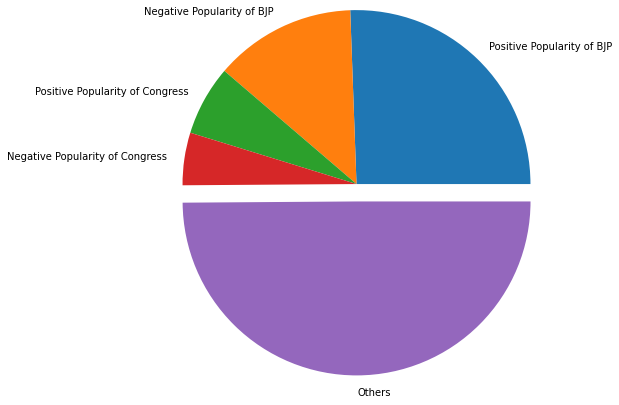

In [34]:
import matplotlib.pyplot as plt
import numpy as np

y = np.array([bjpPositivePopularity,bjpNegativePopularity,congPositivePopularity,congNegativePopularity,rest])
mylabels = ["Positive Popularity of BJP", "Negative Popularity of BJP", "Positive Popularity of Congress", "Negative Popularity of Congress","Others"]

plt.pie(y, labels = mylabels,explode=[0,0,0,0,0.2],radius=2)
plt.show() 

In [35]:
bjpRatio= bjpPositivePopularity/bjpNegativePopularity
congRatio = congPositivePopularity/congNegativePopularity
bjpRatioNeg=bjpNegativePopularity/ bjpPositivePopularity
congRatioNeg = congNegativePopularity/congPositivePopularity

In [36]:
print(bjpRatio)
print(congRatio)

1.9440316988608224
1.3330365093499554


# Plotting the Positive: Negative ratio

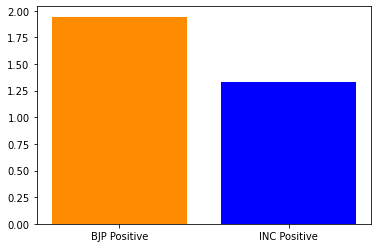

In [37]:
import matplotlib.pyplot as plt
import numpy as np


x = np.array(["BJP Positive","INC Positive"])
y = np.array([bjpRatio,congRatio, ])

plt.bar(x,y,color=['#FF8C00','blue'])
plt.show()

# Plotting the Percentage of positive tweets among the total tweets for a party

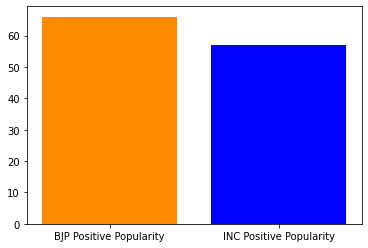

In [38]:
# plotting percent graph
import matplotlib.pyplot as plt
import numpy as np

x = np.array(["BJP Positive Popularity","INC Positive Popularity"])
y = np.array([bjpPerc,congPerc])

plt.bar(x,y,color=['#FF8C00','blue'])
plt.show()

# Plotting data with sarcasm handling

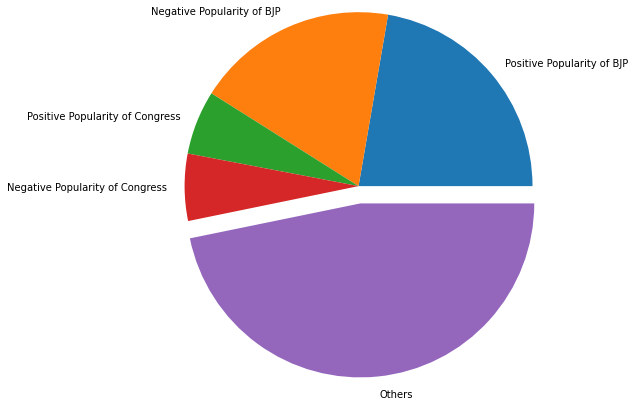

In [39]:
import matplotlib.pyplot as plt
import numpy as np

y = np.array([bjpPositivePopularityWithSarcas,bjpNegativePopularityWithSarcas,congPositivePopularityWithSarcas,congNegativePopularityWithSarcas,rest])
mylabels = ["Positive Popularity of BJP", "Negative Popularity of BJP", "Positive Popularity of Congress", "Negative Popularity of Congress","Others"]

plt.pie(y, labels = mylabels,explode=[0,0,0,0,0.2],radius=2)
plt.show() 

In [38]:
# Plotting bar chart for percentage

In [40]:
bjpPercWS = 100*bjpPositivePopularityWithSarcas/(bjpPositivePopularityWithSarcas+bjpNegativePopularityWithSarcas)
congPercWS = 100*congPositivePopularityWithSarcas/(congPositivePopularityWithSarcas+congNegativePopularityWithSarcas)
rest = 100 - (bjpPositivePopularityWithSarcas+bjpNegativePopularityWithSarcas+congPositivePopularityWithSarcas+congNegativePopularityWithSarcas)

In [44]:
print(bjpPerc)
print(congPerc)
print(bjpPercWS)
print(congPercWS)

66.03297442799462
57.137404580152676
54.284721877636095
48.87067090513636


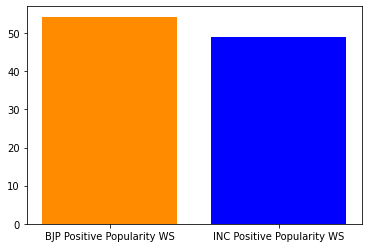

In [41]:
# plotting percent graph for with sarcasm results
import matplotlib.pyplot as plt
import numpy as np

x = np.array(["BJP Positive Popularity WS","INC Positive Popularity WS"])
y = np.array([bjpPercWS,congPercWS])

plt.bar(x,y,color=['#FF8C00','blue'])
plt.show()

In [42]:
bjpRatioWS= bjpPositivePopularityWithSarcas/bjpNegativePopularityWithSarcas
congRatioWS = congPositivePopularityWithSarcas/congNegativePopularityWithSarcas
bjpRatioNegWS=bjpNegativePopularityWithSarcas/ bjpPositivePopularityWithSarcas
congRatioNegWS = congNegativePopularityWithSarcas/congPositivePopularityWithSarcas


In [43]:
print(bjpRatioWS)
print(congRatioWS)

1.1874525127537177
0.9558246073298429


# Plotting the Positive: Negative tweets for both the  party

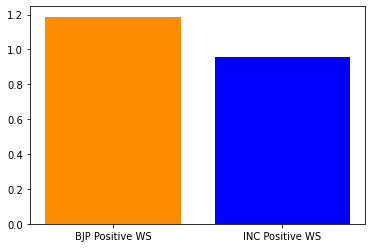

In [45]:
import matplotlib.pyplot as plt
import numpy as np

x = np.array(["BJP Positive WS","INC Positive WS",])
y = np.array([bjpRatioWS,congRatioWS])

plt.bar(x,y,color=['#FF8C00','blue'])
plt.show()